In [486]:
import pandas as pd
import numpy as np
from scipy.linalg import diagsvd
import matplotlib.pyplot as plt
import os
os.chdir('/Users/sosuke/Downloads')
from pca import pca
from scipy.linalg import fractional_matrix_power
from sklearn.cross_decomposition import CCA
from scipy.spatial import distance_matrix

In [7]:
col_3 = ["shock", "vibrate", "static1", "static2", "distance"]
df3 = pd.read_table('p3.txt', delimiter = '  ', names = col_3)

/Users/sosuke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [8]:
df3 # Data set

,shock,vibrate,static1,static2,distance
0,1889,1651,1561,1778,0.60
1,2403,2048,2087,2197,5.48
2,2119,1700,1815,2222,7.62
3,1645,1627,1110,1533,5.21
4,1976,1916,1614,1883,1.40
5,1712,1712,1439,1546,2.22
6,1943,1685,1271,1671,4.99
7,2104,1820,1717,1874,1.49
8,2983,2794,2412,2581,12.26
9,1745,1600,1384,1508,0.77


In [663]:
S = df3.loc[:, ["shock", "vibrate", "static1", "static2"]].cov()
S_x = S.loc[["shock", "vibrate"], ["shock", "vibrate"]]
S_y = S.loc[["static1", "static2"], ["static1", "static2"]]
S_xy = S.loc[["shock", "vibrate"], ["static1", "static2"]]
G = np.dot(np.dot(fractional_matrix_power(S_x, -0.5), S_xy), fractional_matrix_power(S_y, -0.5))

In [665]:
u, s, v = np.linalg.svd(G, full_matrices=False, compute_uv=True)

In [666]:
u

array([[-0.89032372, -0.4553281 ],
       [-0.4553281 ,  0.89032372]])

In [667]:
v

array([[-0.69045146, -0.72337873],
       [ 0.72337873, -0.69045146]])

The canonical correlations $\sigma_1$ and $\sigma_2$ are given as the first and the second singular value, i.e.

In [668]:
s[0], s[1]

(0.9191348407413426, 0.07463326874446909)

Since $U_1 = u_1^T S_x^{-1/2}X$ and $V_1 = v_1^T S_y^{-1/2}Y$ where $u_1$ and $v_1$ are first left and right singular vectors, respectively,

In [672]:
a_1 = np.dot(fractional_matrix_power(S_x, -0.5), u[:, 0])
b_1 = np.dot(fractional_matrix_power(S_y, -0.5), v[0, :])
a_1, b_1

(array([-0.00369591,  0.00086616]), array([-0.00163167, -0.00152456]))

$$U_1 = -0.00370shock - 0.000866vibrate$$
$$V_1 = -0.00163static1 - 0.00152static2$$

The plots with the first cannonical correlation vectors and the second canonical correlation vectors are shown below.

In [132]:
U_1 = np.dot(df3.loc[:,["shock", "vibrate"]], a_1)
V_1 = np.dot(df3.loc[:,["static1", "static2"]], b_1)

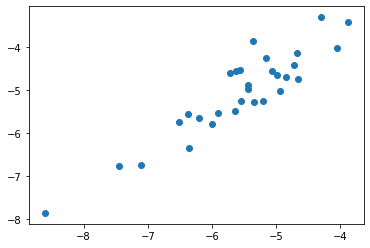

In [133]:
plt.scatter(U_1, V_1)

In [135]:
a_2 = np.dot(fractional_matrix_power(S_x, -0.5), u[:, 1])
b_2 = np.dot(fractional_matrix_power(S_y, -0.5), v[1, :])

In [136]:
U_2 = np.dot(df3.loc[:,["shock", "vibrate"]], a_2)
V_2 = np.dot(df3.loc[:,["static1", "static2"]], b_2)

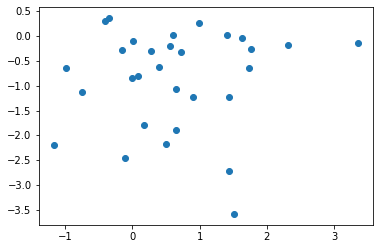

In [137]:
plt.scatter(U_2, V_2)

In the first plot, we can see that the correlation is very high. In fact, as we calculated in (a), the correlation of these points corresponds to the first canonical correlation, which is 0.919. 
In the second plot, we can see that there is not much correlation. This correlation corresponds to the second canonical correlation in (a), which is 0.075, and this in fact is very close to 0.